In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [2]:
tesla = yf.Ticker("TSLA")

In [3]:
tesla_data = tesla.history(period="max")

In [4]:
tesla_data.reset_index(inplace=True)

In [5]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [9]:
html_data = requests.get(url).text

In [10]:
soup = BeautifulSoup(html_data, 'html5lib')

In [23]:
tables = soup.find_all('table')

In [24]:
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
print(table_index)

1


In [85]:
tesla_revenue = pd.read_html(str(tables[1]))[0]
tesla_revenue.rename({'Tesla Quarterly Revenue(Millions of US $)':'Date','Tesla Quarterly Revenue(Millions of US $).1':'Revenue'}, axis='columns', inplace=True)
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In [104]:
tesla_revenue["Revenue"].str.replace(',|\$',"")
tesla_revenue.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [69]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [72]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [75]:
game_stop = yf.Ticker("GME")

In [76]:
gme_data = game_stop.history(period="max")

In [77]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


In [78]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [79]:
html2_data = requests.get(url2).text

In [80]:
soup2 = BeautifulSoup(html2_data, 'html5lib')

In [81]:
tables2 = soup2.find_all('table')

In [82]:
for index,table in enumerate(tables2):
    if ("GameStop Quarterly Revenue" in str(table)):
        table_index = index
print(table_index)

1


In [92]:
gme_revenue = pd.read_html(str(tables2[1]))[0]
gme_revenue.rename({'GameStop Quarterly Revenue(Millions of US $)':'Date','GameStop Quarterly Revenue(Millions of US $).1':'Revenue'}, axis='columns', inplace=True)
gme_revenue.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


In [106]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [107]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


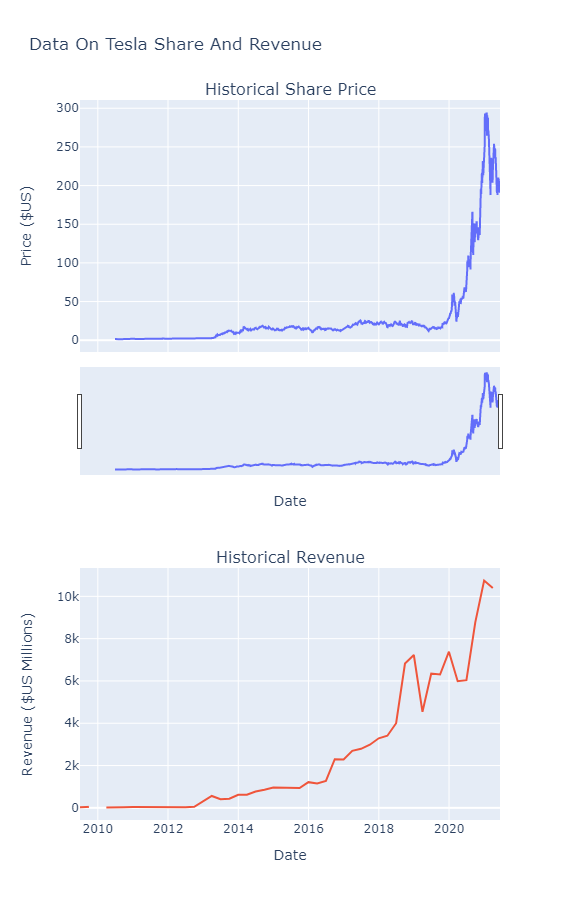

In [113]:
make_graph(tesla_data, tesla_revenue, 'Data On Tesla Share And Revenue')

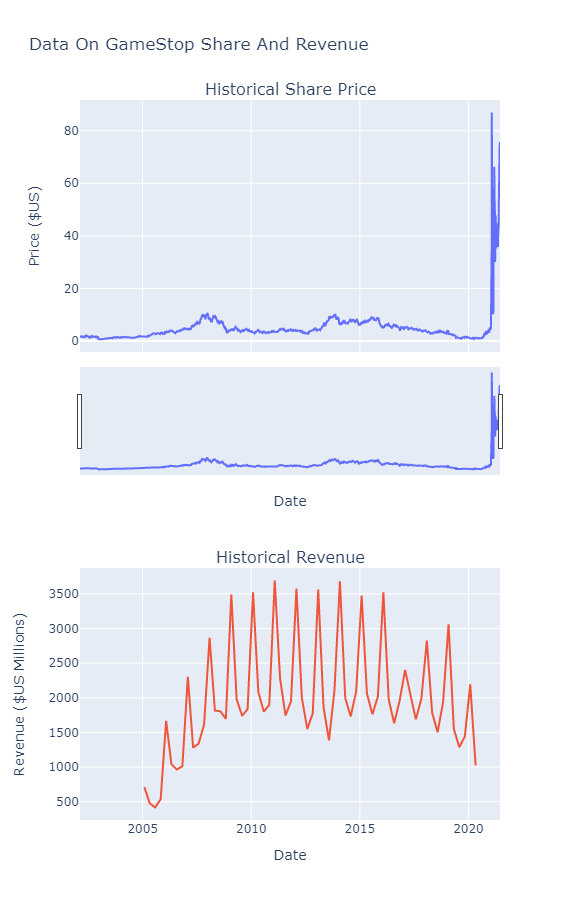

In [112]:
make_graph(gme_data, gme_revenue, 'Data On GameStop Share And Revenue')